# HomeWork 6 Problem 3A and 3B

# Matthew Anderson | 801203905

# Github https://github.com/Mand187/Intro-to-ML


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [36]:
def loadCifar10Data():
    # Load CIFAR-10 dataset
    (xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

    # Normalize pixel values to between 0 and 1
    xTrain = xTrain.astype('float32') / 255.0
    xTest = xTest.astype('float32') / 255.0

    # Flatten images
    xTrainFlat = xTrain.reshape(xTrain.shape[0], -1)
    xTestFlat = xTest.reshape(xTest.shape[0], -1)

    # One-hot encode the labels
    yTrainOneHot = to_categorical(yTrain)
    yTestOneHot = to_categorical(yTest)

    return xTrainFlat, yTrainOneHot, xTestFlat, yTestOneHot, yTest

In [37]:
def createNeuralNetworkModel(inputDim, numClasses, hiddenLayers=1):
    model = Sequential()

    # Input layer
    model.add(Dense(256, input_dim=inputDim, activation='relu'))

    # Additional hidden layers
    for _ in range(hiddenLayers - 1):
        model.add(Dense(256, activation='relu'))

    # Output layer with softmax for multi-class classification
    model.add(Dense(numClasses, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [38]:
def trainNeuralNetwork(xTrain, yTrain, xVal, yVal, numClasses, hiddenLayers=1):
    # Create model
    model = createNeuralNetworkModel(xTrain.shape[1], numClasses, hiddenLayers)

    # Early stopping
    earlyStopping = EarlyStopping(
        monitor='val_accuracy',
        patience=100,
        restore_best_weights=True
    )

    # Train the model
    startTime = time.time()
    history = model.fit(
        xTrain, yTrain,
        validation_data=(xVal, yVal),
        epochs=100,
        batch_size=64,
        callbacks=[earlyStopping],
        verbose=1
    )
    trainingTime = time.time() - startTime

    return model, history, trainingTime

In [39]:
def plotTrainingHistory(history, title):
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot loss
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title(f'{title} - Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot accuracy
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title(f'{title} - Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [40]:
def evaluateModel(model, xTest, yTest, yTestRaw):
    # Predict probabilities and convert to class predictions
    yPredProb = model.predict(xTest)
    yPred = np.argmax(yPredProb, axis=1)
    yTrue = np.argmax(yTest, axis=1) if len(yTest.shape) > 1 else yTest

    # Calculate metrics
    accuracy = accuracy_score(yTrue, yPred)
    classReport = classification_report(yTrue, yPred)
    confMatrix = confusion_matrix(yTrue, yPred)

    # Visualize confusion matrix
    classLabels = np.unique(yTrue)
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        confMatrix, annot=True, fmt='d', cmap='Blues',
        xticklabels=classLabels, yticklabels=classLabels
    )
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Plot some misclassified images (ensure this function is defined)
    plotMisclassifiedImages(model, xTest, yTrue, yPred)

    return {
        'accuracy': accuracy,
        'classification_report': classReport
    }

In [41]:
def plotMisclassifiedImages(model, xTest, yTrue, yPred, num_images=9):
    # Find misclassified images
    misclassified_indices = np.where(yTrue != yPred)[0]

    # CIFAR-10 class names
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

    # Reshape images back to 2D
    xTestReshape = xTest.reshape(-1, 32, 32, 3)

    # Plot misclassified images
    plt.figure(figsize=(15, 5))
    for i in range(min(num_images, len(misclassified_indices))):
        plt.subplot(3, 3, i+1)
        idx = misclassified_indices[i]
        plt.imshow(xTestReshape[idx])
        plt.title(f'True: {class_names[yTrue[idx]]}\nPred: {class_names[yPred[idx]]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Part A: Single Hidden Layer Neural Network
Epoch 1/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.2680 - loss: 2.1006 - val_accuracy: 0.3700 - val_loss: 1.7801
Epoch 2/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.3713 - loss: 1.7561 - val_accuracy: 0.3716 - val_loss: 1.7710
Epoch 3/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.3979 - loss: 1.6837 - val_accuracy: 0.4010 - val_loss: 1.6982
Epoch 4/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.4181 - loss: 1.6334 - val_accuracy: 0.3958 - val_loss: 1.6770
Epoch 5/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.4249 - loss: 1.6105 - val_accuracy: 0.4318 - val_loss: 1.6138
Epoch 6/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.4387 - loss: 1.5815 - val_accuracy: 0.4378 - val_loss: 1.5746
Epoch 7/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4407 - loss: 1.5646 - val_accuracy: 0.4346 - val_loss: 1.5964
Epoch 8/100
704/704 ━━━━━━━━━━━━━━━━━━━━

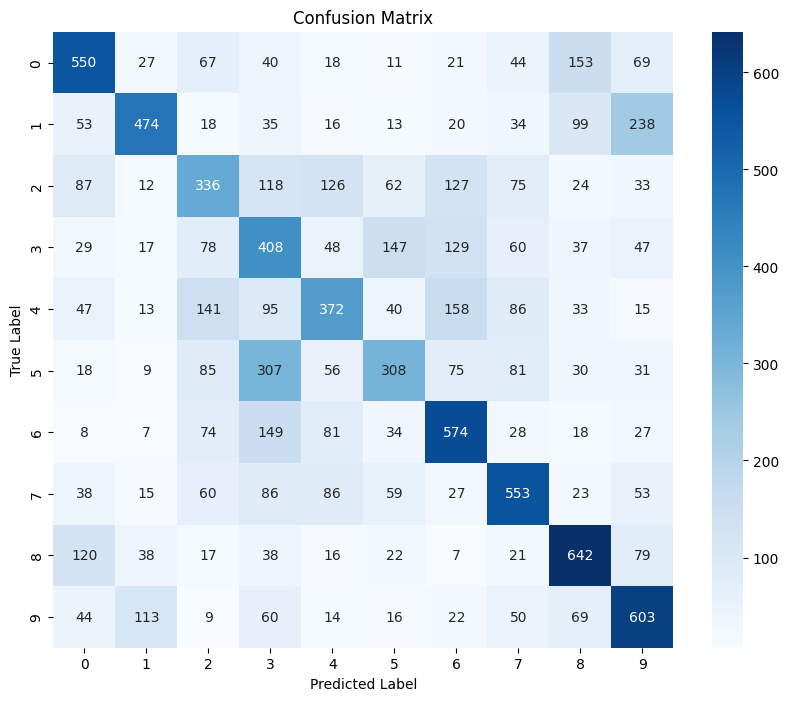

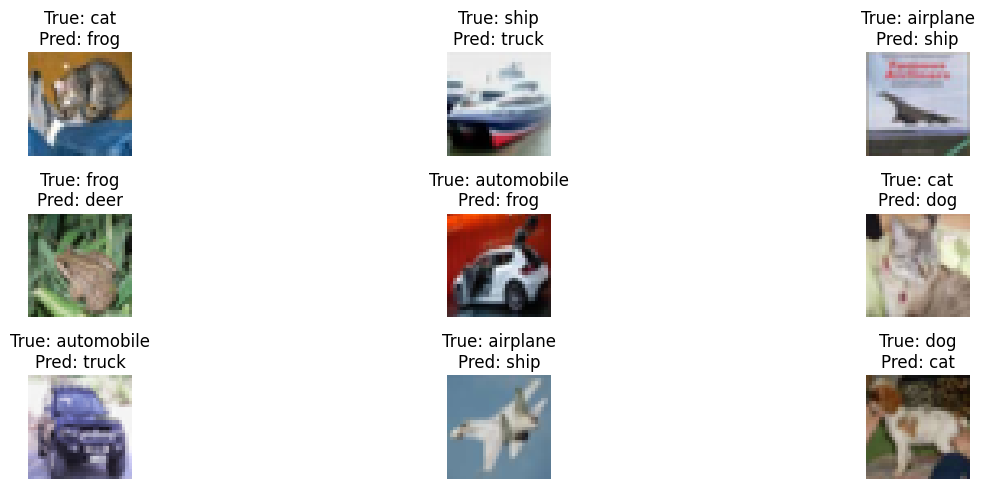

Test Accuracy: 0.4820

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1000
           1       0.65      0.47      0.55      1000
           2       0.38      0.34      0.36      1000
           3       0.31      0.41      0.35      1000
           4       0.45      0.37      0.41      1000
           5       0.43      0.31      0.36      1000
           6       0.49      0.57      0.53      1000
           7       0.54      0.55      0.54      1000
           8       0.57      0.64      0.60      1000
           9       0.50      0.60      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.48     10000
weighted avg       0.49      0.48      0.48     10000



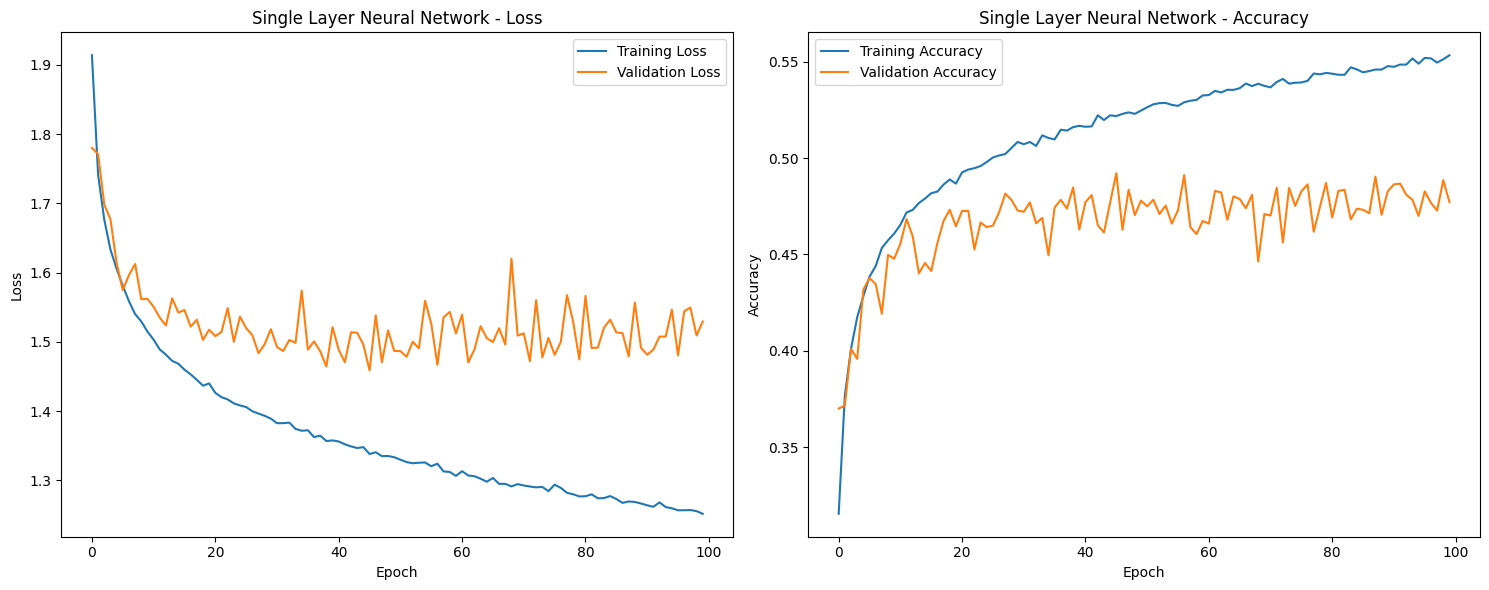

In [42]:
# Load and preprocess data
xTrain, yTrain, xTest, yTest, yTestRaw = loadCifar10Data()

# Split training data into train and validation
xTrain, xVal = xTrain[:-5000], xTrain[-5000:]
yTrain, yVal = yTrain[:-5000], yTrain[-5000:]

# Part a: Single Hidden Layer Neural Network
print("Part A: Single Hidden Layer Neural Network")
modelSingle, historySingle, trainingTimeSingle = trainNeuralNetwork(xTrain, yTrain, xVal, yVal, numClasses=10, hiddenLayers=1)

trainingTimeMinutes = trainingTimeSingle / 60

print(f"Training Time: {trainingTimeMinutes:.2f} minutes")
print(f"Final Training Loss: {historySingle.history['loss'][-1]:.4f}")
print(f"Final Validation Accuracy: {historySingle.history['val_accuracy'][-1]:.4f}")

# Evaluate single layer model
print("\nSingle Layer Model Evaluation:")
singleLayerEval = evaluateModel(modelSingle, xTest, yTest, yTestRaw)
print(f"Test Accuracy: {singleLayerEval['accuracy']:.4f}")
print("\nClassification Report:")
print(singleLayerEval['classification_report'])

# Plot training history for single layer
plotTrainingHistory(historySingle, 'Single Layer Neural Network')


Part B: Three Hidden Layers Neural Network


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.2775 - loss: 1.9811 - val_accuracy: 0.3236 - val_loss: 1.8707
Epoch 2/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.3797 - loss: 1.7213 - val_accuracy: 0.4032 - val_loss: 1.6814
Epoch 3/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.4238 - loss: 1.6002 - val_accuracy: 0.4328 - val_loss: 1.5938
Epoch 4/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.4485 - loss: 1.5457 - val_accuracy: 0.4398 - val_loss: 1.5547
Epoch 5/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.4601 - loss: 1.5042 - val_accuracy: 0.4540 - val_loss: 1.5174
Epoch 6/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.4770 - loss: 1.4567 - val_accuracy: 0.4802 - val_loss: 1.4649
Epoch 7/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.4901 - loss: 1.4252 - val_accuracy: 0.4730 - val_loss: 1.4903
Epoch 8/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.4995 - loss: 1

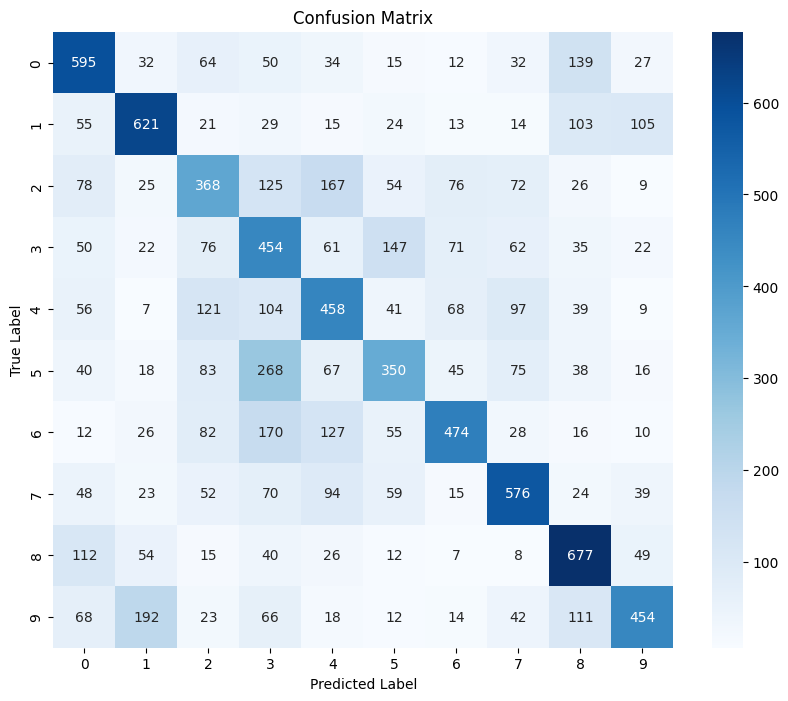

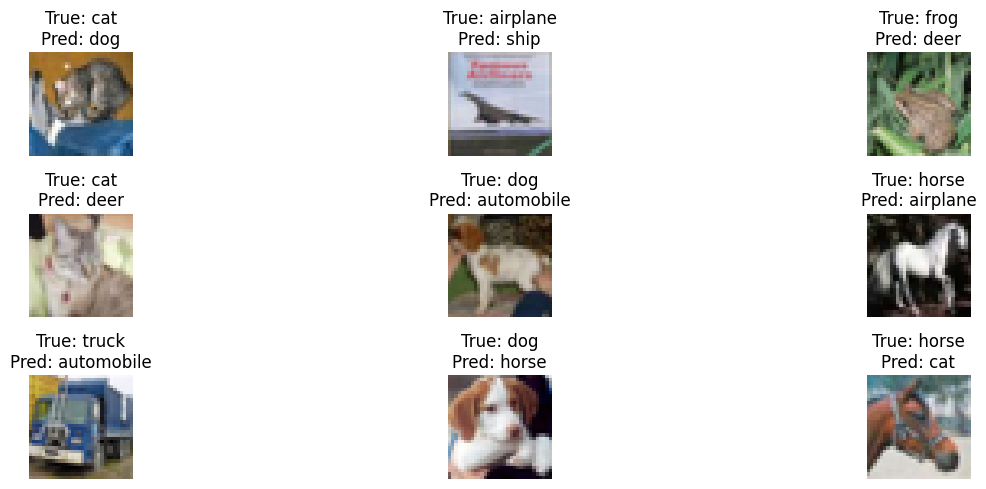

Test Accuracy: 0.5027

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.59      0.56      1000
           1       0.61      0.62      0.61      1000
           2       0.41      0.37      0.39      1000
           3       0.33      0.45      0.38      1000
           4       0.43      0.46      0.44      1000
           5       0.46      0.35      0.40      1000
           6       0.60      0.47      0.53      1000
           7       0.57      0.58      0.57      1000
           8       0.56      0.68      0.61      1000
           9       0.61      0.45      0.52      1000

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.50     10000
weighted avg       0.51      0.50      0.50     10000



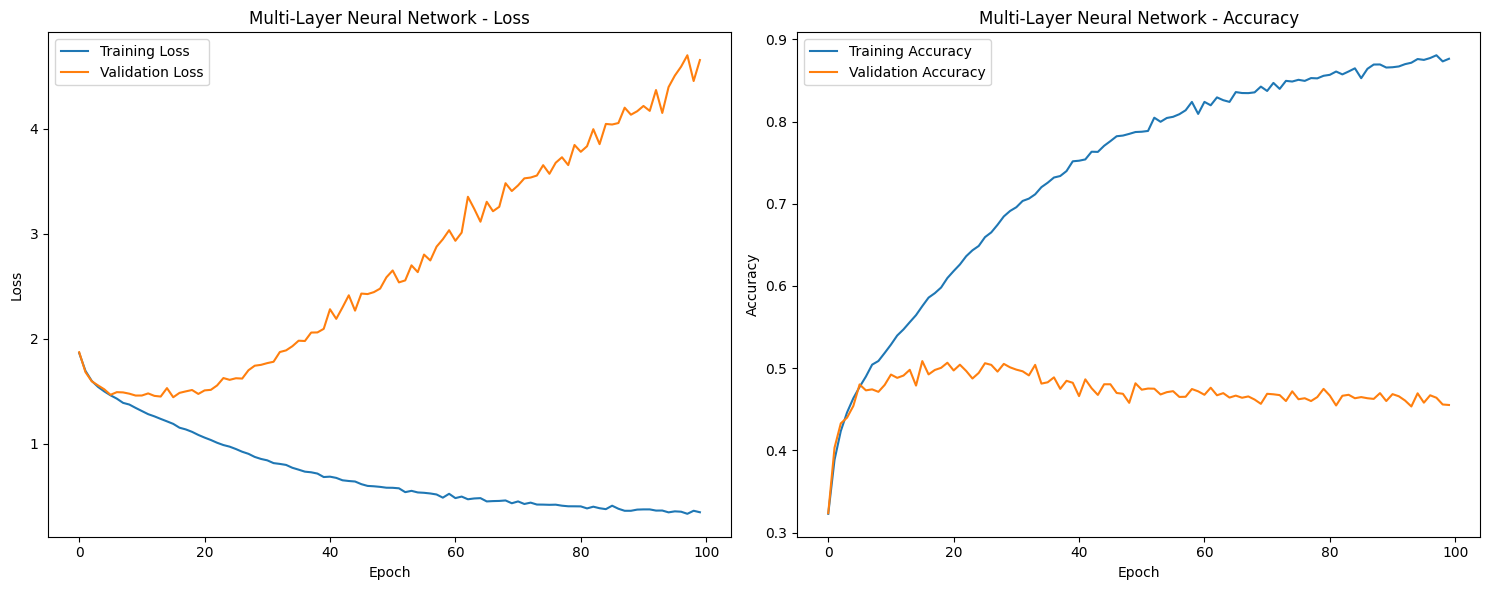

In [43]:
# Part b: Three Hidden Layers Neural Network
print("\nPart B: Three Hidden Layers Neural Network")
modelMulti, historyMulti, trainingTimeMulti = trainNeuralNetwork(xTrain, yTrain, xVal, yVal, numClasses=10, hiddenLayers=3)

trainingTimeMultiMinutes = trainingTimeMulti / 60

print(f"Training Time: {trainingTimeMultiMinutes:.2f} minutes")
print(f"Final Training Loss: {historyMulti.history['loss'][-1]:.4f}")
print(f"Final Validation Accuracy: {historyMulti.history['val_accuracy'][-1]:.4f}")

# Evaluate multi-layer model
print("\nMulti-Layer Model Evaluation:")
multiLayerEval = evaluateModel(modelMulti, xTest, yTest, yTestRaw)
print(f"Test Accuracy: {multiLayerEval['accuracy']:.4f}")
print("\nClassification Report:")
print(multiLayerEval['classification_report'])

# Plot training history for multi-layer
plotTrainingHistory(historyMulti, 'Multi-Layer Neural Network')